In [1]:
# import packages

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
# Import dataset
data = pd.read_csv("data/kc_house_data.csv")
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,...,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30150,7834800180,11/30/2021,1555000.0,5,2.0,1910,4000,1.5,NO,NO,...,PUBLIC,1600,1130,0,210,1921,0,"4673 Eastern Avenue North, Seattle, Washington...",47.664740,-122.32940
30151,194000695,6/16/2021,1313000.0,3,2.0,2020,5800,2.0,NO,NO,...,PUBLIC,2020,0,0,520,2011,0,"4131 44th Avenue Southwest, Seattle, Washingto...",47.565610,-122.38851
30152,7960100080,5/27/2022,800000.0,3,2.0,1620,3600,1.0,NO,NO,...,PUBLIC,940,920,240,110,1995,0,"910 Martin Luther King Jr Way, Seattle, Washin...",47.610395,-122.29585
30153,2781280080,2/24/2022,775000.0,3,2.5,2570,2889,2.0,NO,NO,...,PUBLIC,1830,740,480,100,2006,0,"17127 114th Avenue Southeast, Renton, Washingt...",47.449490,-122.18908


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30155 entries, 0 to 30154
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             30155 non-null  int64  
 1   date           30155 non-null  object 
 2   price          30155 non-null  float64
 3   bedrooms       30155 non-null  int64  
 4   bathrooms      30155 non-null  float64
 5   sqft_living    30155 non-null  int64  
 6   sqft_lot       30155 non-null  int64  
 7   floors         30155 non-null  float64
 8   waterfront     30155 non-null  object 
 9   greenbelt      30155 non-null  object 
 10  nuisance       30155 non-null  object 
 11  view           30155 non-null  object 
 12  condition      30155 non-null  object 
 13  grade          30155 non-null  object 
 14  heat_source    30123 non-null  object 
 15  sewer_system   30141 non-null  object 
 16  sqft_above     30155 non-null  int64  
 17  sqft_basement  30155 non-null  int64  
 18  sqft_g

In [4]:
data.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long
id,1.000000,-0.034184,-0.006306,-0.012094,-0.027932,-0.119101,0.032043,-0.023216,-0.014662,-0.007829,-0.041625,0.023071,-0.029131,-0.000691,0.000479
price,-0.034184,1.000000,0.289204,0.480401,0.608521,0.085730,0.180576,0.538651,0.245058,0.264169,0.313409,0.096013,0.084786,0.063632,-0.022509
bedrooms,-0.006306,0.289204,1.000000,0.589273,0.637874,0.003306,0.147592,0.547164,0.238502,0.319441,0.183439,0.146191,0.014286,0.108758,-0.106689
bathrooms,-0.012094,0.480401,0.589273,1.000000,0.772677,0.035886,0.404412,0.674924,0.260902,0.457022,0.327551,0.443648,0.040631,-0.005225,0.017400
sqft_living,-0.027932,0.608521,0.637874,0.772677,1.000000,0.119563,0.304240,0.883984,0.338460,0.511740,0.396030,0.291694,0.038499,0.102186,-0.087669
sqft_lot,-0.119101,0.085730,0.003306,0.035886,0.119563,1.000000,-0.032097,0.129231,0.004111,0.087169,0.155250,0.001750,0.010049,0.030020,-0.034308
floors,0.032043,0.180576,0.147592,0.404412,0.304240,-0.032097,1.000000,0.448281,-0.248093,0.132656,0.125183,0.544646,-0.025449,-0.218554,0.233781
sqft_above,-0.023216,0.538651,0.547164,0.674924,0.883984,0.129231,0.448281,1.000000,-0.066801,0.560551,0.312117,0.387448,0.010598,0.092258,-0.082744
sqft_basement,-0.014662,0.245058,0.238502,0.260902,0.338460,0.004111,-0.248093,-0.066801,1.000000,0.026361,0.210500,-0.230226,0.053634,0.059788,-0.045208
sqft_garage,-0.007829,0.264169,0.319441,0.457022,0.511740,0.087169,0.132656,0.560551,0.026361,1.000000,0.216354,0.447560,-0.098603,0.092346,-0.096861


# Initial Look at Data to Get Information

In [5]:
data['sqft_above'].value_counts()

1200    282
1300    282
1060    271
1100    268
1250    265
       ... 
1799      1
1783      1
1767      1
7700      1
2049      1
Name: sqft_above, Length: 1187, dtype: int64

In [6]:
data['heat_source'].value_counts()

Gas                  20583
Electricity           6465
Oil                   2899
Gas/Solar               93
Electricity/Solar       59
Other                   20
Oil/Solar                4
Name: heat_source, dtype: int64

In [7]:
data['sewer_system'].value_counts()

PUBLIC                25777
PRIVATE                4355
PRIVATE RESTRICTED        6
PUBLIC RESTRICTED         3
Name: sewer_system, dtype: int64

In [8]:
data['sewer_system'].isnull()

0        False
1        False
2        False
3        False
4        False
         ...  
30150    False
30151    False
30152    False
30153    False
30154    False
Name: sewer_system, Length: 30155, dtype: bool

# One duplicate in ID, a few nulls in 'Sewer_system' and 'heat_source', could drop these since there are only a few

### Dropping the duplicated ID

In [9]:
#Check for duplicates
data[data.duplicated(subset=['id'])]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
4846,1233100736,9/28/2021,2600000.0,3,4.0,3500,8455,2.0,NO,NO,...,PUBLIC,2590,1410,500,290,2019,0,"12611 Northeast 87th Place, Kirkland, Washingt...",47.68069,-122.172135


In [10]:
#Verify that duplicate is actually a duplicate
data[data['id'].isin(['1233100736'])]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
4845,1233100736,9/28/2021,2600000.0,3,4.0,3500,8455,2.0,NO,NO,...,PUBLIC,2590,1410,500,290,2019,0,"12611 Northeast 87th Place, Kirkland, Washingt...",47.68069,-122.172135
4846,1233100736,9/28/2021,2600000.0,3,4.0,3500,8455,2.0,NO,NO,...,PUBLIC,2590,1410,500,290,2019,0,"12611 Northeast 87th Place, Kirkland, Washingt...",47.68069,-122.172135


In [11]:
#Dropping duplicate row
data_clean = data.drop_duplicates(subset = ['id'])
data_clean

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,...,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30150,7834800180,11/30/2021,1555000.0,5,2.0,1910,4000,1.5,NO,NO,...,PUBLIC,1600,1130,0,210,1921,0,"4673 Eastern Avenue North, Seattle, Washington...",47.664740,-122.32940
30151,194000695,6/16/2021,1313000.0,3,2.0,2020,5800,2.0,NO,NO,...,PUBLIC,2020,0,0,520,2011,0,"4131 44th Avenue Southwest, Seattle, Washingto...",47.565610,-122.38851
30152,7960100080,5/27/2022,800000.0,3,2.0,1620,3600,1.0,NO,NO,...,PUBLIC,940,920,240,110,1995,0,"910 Martin Luther King Jr Way, Seattle, Washin...",47.610395,-122.29585
30153,2781280080,2/24/2022,775000.0,3,2.5,2570,2889,2.0,NO,NO,...,PUBLIC,1830,740,480,100,2006,0,"17127 114th Avenue Southeast, Renton, Washingt...",47.449490,-122.18908


### Removing the nulls from 'sewer_System' and 'heat_source'

In [12]:
#Drop columns with missing data
data_clean = data_clean.dropna(subset=['sewer_system', 'heat_source'])
data_clean

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,...,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30150,7834800180,11/30/2021,1555000.0,5,2.0,1910,4000,1.5,NO,NO,...,PUBLIC,1600,1130,0,210,1921,0,"4673 Eastern Avenue North, Seattle, Washington...",47.664740,-122.32940
30151,194000695,6/16/2021,1313000.0,3,2.0,2020,5800,2.0,NO,NO,...,PUBLIC,2020,0,0,520,2011,0,"4131 44th Avenue Southwest, Seattle, Washingto...",47.565610,-122.38851
30152,7960100080,5/27/2022,800000.0,3,2.0,1620,3600,1.0,NO,NO,...,PUBLIC,940,920,240,110,1995,0,"910 Martin Luther King Jr Way, Seattle, Washin...",47.610395,-122.29585
30153,2781280080,2/24/2022,775000.0,3,2.5,2570,2889,2.0,NO,NO,...,PUBLIC,1830,740,480,100,2006,0,"17127 114th Avenue Southeast, Renton, Washingt...",47.449490,-122.18908


In [13]:
data_clean['waterfront'].value_counts()

NO     29599
YES      511
Name: waterfront, dtype: int64

# Separating Out Zipcode from the Address

In [14]:
data_clean['address']

0        2102 Southeast 21st Court, Renton, Washington ...
1        11231 Greenwood Avenue North, Seattle, Washing...
2        8504 South 113th Street, Seattle, Washington 9...
3        4079 Letitia Avenue South, Seattle, Washington...
4        2193 Northwest Talus Drive, Issaquah, Washingt...
                               ...                        
30150    4673 Eastern Avenue North, Seattle, Washington...
30151    4131 44th Avenue Southwest, Seattle, Washingto...
30152    910 Martin Luther King Jr Way, Seattle, Washin...
30153    17127 114th Avenue Southeast, Renton, Washingt...
30154    18615 7th Avenue South, Burien, Washington 981...
Name: address, Length: 30110, dtype: object

In [15]:
# This creates a new column with our zipcodes of the houses
data_clean['postal_code'] = data_clean['address'].str[-20:-15]
data_clean

<ipython-input-15-ad923d199017>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['postal_code'] = data_clean['address'].str[-20:-15]


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long,postal_code
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052,98055
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591,98133
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520,98178
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020,98118
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,...,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188,98027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30150,7834800180,11/30/2021,1555000.0,5,2.0,1910,4000,1.5,NO,NO,...,1600,1130,0,210,1921,0,"4673 Eastern Avenue North, Seattle, Washington...",47.664740,-122.32940,98103
30151,194000695,6/16/2021,1313000.0,3,2.0,2020,5800,2.0,NO,NO,...,2020,0,0,520,2011,0,"4131 44th Avenue Southwest, Seattle, Washingto...",47.565610,-122.38851,98116
30152,7960100080,5/27/2022,800000.0,3,2.0,1620,3600,1.0,NO,NO,...,940,920,240,110,1995,0,"910 Martin Luther King Jr Way, Seattle, Washin...",47.610395,-122.29585,98122
30153,2781280080,2/24/2022,775000.0,3,2.5,2570,2889,2.0,NO,NO,...,1830,740,480,100,2006,0,"17127 114th Avenue Southeast, Renton, Washingt...",47.449490,-122.18908,98055


In [16]:
#verify no missing values -- sanity check 
data_clean.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
greenbelt        0
nuisance         0
view             0
condition        0
grade            0
heat_source      0
sewer_system     0
sqft_above       0
sqft_basement    0
sqft_garage      0
sqft_patio       0
yr_built         0
yr_renovated     0
address          0
lat              0
long             0
postal_code      0
dtype: int64

In [17]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30110 entries, 0 to 30154
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             30110 non-null  int64  
 1   date           30110 non-null  object 
 2   price          30110 non-null  float64
 3   bedrooms       30110 non-null  int64  
 4   bathrooms      30110 non-null  float64
 5   sqft_living    30110 non-null  int64  
 6   sqft_lot       30110 non-null  int64  
 7   floors         30110 non-null  float64
 8   waterfront     30110 non-null  object 
 9   greenbelt      30110 non-null  object 
 10  nuisance       30110 non-null  object 
 11  view           30110 non-null  object 
 12  condition      30110 non-null  object 
 13  grade          30110 non-null  object 
 14  heat_source    30110 non-null  object 
 15  sewer_system   30110 non-null  object 
 16  sqft_above     30110 non-null  int64  
 17  sqft_basement  30110 non-null  int64  
 18  sqft_g

### Export this cleaned dataset as a .csv, this will be our "master dataset"

In [18]:
data_clean.to_csv('data_cleaned.csv')

In [19]:
data_clean['price'].describe()

count    3.011000e+04
mean     1.108921e+06
std      8.964895e+05
min      2.736000e+04
25%      6.491180e+05
50%      8.600000e+05
75%      1.300000e+06
max      3.075000e+07
Name: price, dtype: float64

# Any homes not within King Count?

In [20]:
data_clean['postal_code'].value_counts(normalize=True)

98042    0.032946
98038    0.028462
98103    0.025274
98115    0.025241
98117    0.024842
           ...   
78257    0.000033
56537    0.000033
58212    0.000033
99701    0.000033
58572    0.000033
Name: postal_code, Length: 399, dtype: float64

In [21]:
#data_clean['postal_code'].hist(figsize=(20,10));

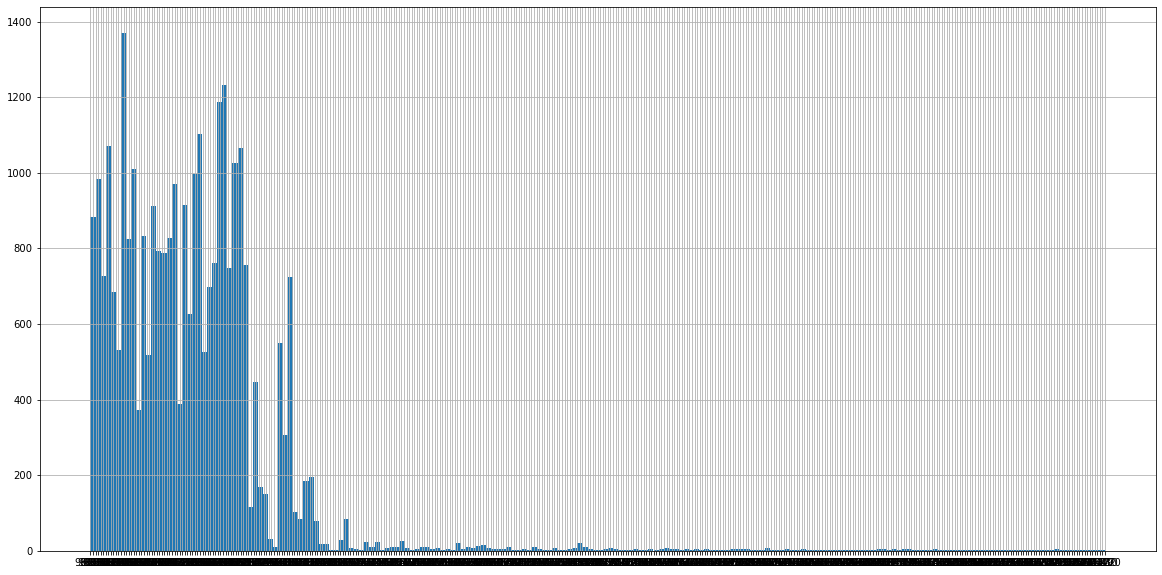

In [22]:
data_clean['postal_code'].hist(bins=200, figsize=(20,10));

In [23]:
#find any postal codes not within King County (King County begins in 98) 
prefixes = ['98']

data_clean[~data_clean.postal_code.str.startswith(tuple(prefixes))]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long,postal_code
12,1797501124,6/25/2021,750000.0,3,2.0,1280,964,3.0,NO,NO,...,1280,0,0,380,2021,0,"5712 A Street, Omaha, Nebraska 68106, United S...",41.225811,-96.001397,68106
53,7548300606,5/3/2022,960000.0,3,2.0,1280,1221,2.0,NO,NO,...,980,300,0,400,2019,0,"1820 South State Street, Vineland, New Jersey ...",39.460807,-75.015361,08360
62,1934800106,8/24/2021,740000.0,2,2.0,1120,734,3.0,NO,NO,...,1120,0,0,260,2021,0,"1804 Spruce Street, McLeansboro, Illinois 6285...",38.075870,-88.535760,62859
159,856000595,7/8/2021,3730000.0,4,4.5,4820,10800,2.0,NO,NO,...,4820,0,850,0,2006,0,"626 13th Street, Union City, New Jersey 07087,...",40.761325,-74.039020,07087
172,1336300219,2/9/2022,759900.0,2,2.0,960,591,3.0,NO,NO,...,960,0,0,240,2021,0,"11th Avenue, West Babylon, New York 11704, Uni...",40.719455,-73.371935,11704
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30029,1978200468,10/28/2021,1480000.0,3,2.0,2050,1090,3.5,NO,NO,...,1920,490,360,240,2021,0,"Avenue Cuts, 34 Ridge Rd, North Arlington, New...",40.782453,-74.137642,07031
30044,9834201391,2/17/2022,520000.0,2,2.0,790,597,2.0,NO,NO,...,520,270,0,210,2021,0,"36th Avenue, Kenosha, Wisconsin 53142, United ...",42.548430,-87.851900,53142
30116,2768100152,1/1/2022,710000.0,1,2.0,1180,616,3.0,NO,NO,...,840,340,0,330,2021,0,"57th Street Lane NW, Rochester, Minnesota 5590...",44.081760,-92.524610,55901
30129,8584800130,11/18/2021,940000.0,2,2.0,1550,1026,2.5,NO,NO,...,1310,470,230,0,2009,0,"214 B, Mount Laurel, New Jersey 08054, United ...",39.955820,-74.881130,08054


In [24]:
#find the indexes of the homes not within King County
prefixes = ['98']

non_king_postals = data_clean[~data_clean.postal_code.str.startswith(tuple(prefixes))].index
non_king_postals

Int64Index([   12,    53,    62,   159,   172,   196,   233,   236,   239,
              245,
            ...
            29900, 29978, 29980, 30019, 30022, 30029, 30044, 30116, 30129,
            30144],
           dtype='int64', length=911)

## *note **
It seems that there are 911 rows that are not within the King's County area. The King's County postal code begins with '98'.

In [25]:
#drop the rows whose postal code does not being with '98'
only_king = data_clean.drop(non_king_postals)
only_king

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long,postal_code
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052,98055
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591,98133
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520,98178
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020,98118
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,...,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188,98027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30150,7834800180,11/30/2021,1555000.0,5,2.0,1910,4000,1.5,NO,NO,...,1600,1130,0,210,1921,0,"4673 Eastern Avenue North, Seattle, Washington...",47.664740,-122.32940,98103
30151,194000695,6/16/2021,1313000.0,3,2.0,2020,5800,2.0,NO,NO,...,2020,0,0,520,2011,0,"4131 44th Avenue Southwest, Seattle, Washingto...",47.565610,-122.38851,98116
30152,7960100080,5/27/2022,800000.0,3,2.0,1620,3600,1.0,NO,NO,...,940,920,240,110,1995,0,"910 Martin Luther King Jr Way, Seattle, Washin...",47.610395,-122.29585,98122
30153,2781280080,2/24/2022,775000.0,3,2.5,2570,2889,2.0,NO,NO,...,1830,740,480,100,2006,0,"17127 114th Avenue Southeast, Renton, Washingt...",47.449490,-122.18908,98055


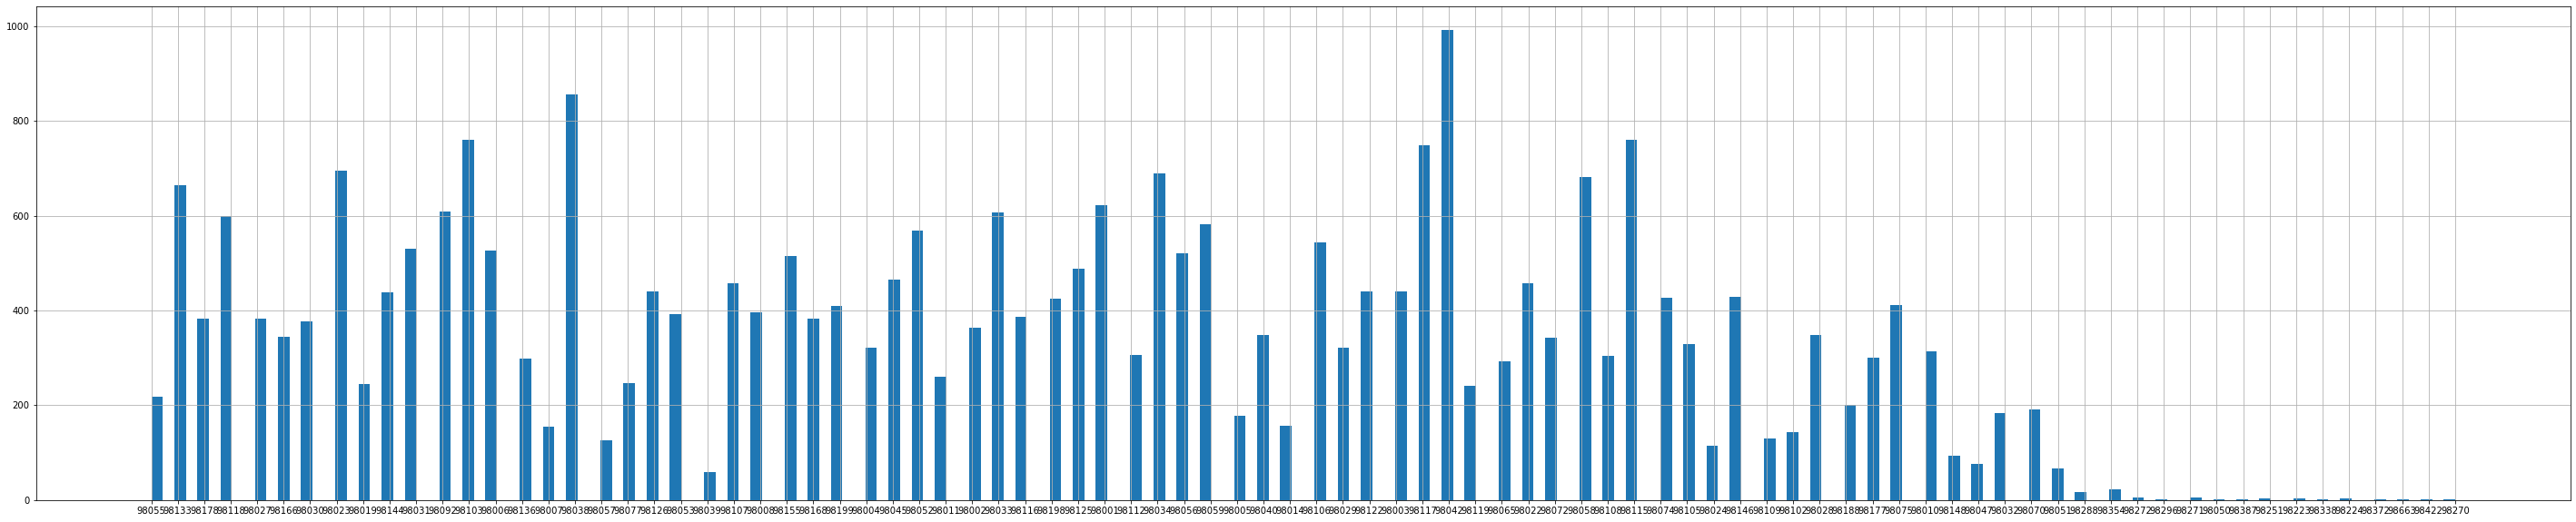

In [26]:
only_king['postal_code'].hist(bins=200, figsize=(50,10));

In [27]:
only_king['postal_code'].nunique

<bound method IndexOpsMixin.nunique of 0        98055
1        98133
2        98178
3        98118
4        98027
         ...  
30150    98103
30151    98116
30152    98122
30153    98055
30154    98148
Name: postal_code, Length: 29199, dtype: object>

## *note**
there might still be some zipcodes present within the dataset that are not within King's County, but are in a neighboring county whose postal code begins with '98' 

In [28]:
only_king.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29199 entries, 0 to 30154
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             29199 non-null  int64  
 1   date           29199 non-null  object 
 2   price          29199 non-null  float64
 3   bedrooms       29199 non-null  int64  
 4   bathrooms      29199 non-null  float64
 5   sqft_living    29199 non-null  int64  
 6   sqft_lot       29199 non-null  int64  
 7   floors         29199 non-null  float64
 8   waterfront     29199 non-null  object 
 9   greenbelt      29199 non-null  object 
 10  nuisance       29199 non-null  object 
 11  view           29199 non-null  object 
 12  condition      29199 non-null  object 
 13  grade          29199 non-null  object 
 14  heat_source    29199 non-null  object 
 15  sewer_system   29199 non-null  object 
 16  sqft_above     29199 non-null  int64  
 17  sqft_basement  29199 non-null  int64  
 18  sqft_g

In [29]:
#change postal code to numeric datatype
only_king['postal_code'] = only_king['postal_code'].astype(float)
print(only_king.dtypes)

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront        object
greenbelt         object
nuisance          object
view              object
condition         object
grade             object
heat_source       object
sewer_system      object
sqft_above         int64
sqft_basement      int64
sqft_garage        int64
sqft_patio         int64
yr_built           int64
yr_renovated       int64
address           object
lat              float64
long             float64
postal_code      float64
dtype: object


# Explore

In [30]:
data_clean.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long
count,3.011000e+04,3.011000e+04,30110.000000,30110.000000,30110.000000,3.011000e+04,30110.000000,30110.000000,30110.000000,30110.000000,30110.000000,30110.000000,30110.000000,30110.000000,30110.000000
mean,4.539281e+09,1.108921e+06,3.415211,2.335653,2113.296745,1.664907e+04,1.543491,1810.363766,476.586118,330.469678,217.448854,1975.160844,90.795782,47.328471,-121.318844
std,2.882221e+09,8.964895e+05,0.979769,0.888256,973.436623,5.993401e+04,0.567793,877.729415,579.790030,285.728094,245.305708,32.052466,416.204209,1.433331,5.724166
min,1.000055e+06,2.736000e+04,0.000000,0.000000,3.000000,4.020000e+02,1.000000,2.000000,0.000000,0.000000,0.000000,1900.000000,0.000000,21.274240,-157.791480
25%,2.071850e+09,6.491180e+05,3.000000,2.000000,1420.000000,4.850000e+03,1.000000,1180.000000,0.000000,0.000000,40.000000,1953.000000,0.000000,47.405334,-122.326078
50%,3.876000e+09,8.600000e+05,3.000000,2.500000,1920.000000,7.476000e+03,1.500000,1560.000000,0.000000,400.000000,150.000000,1977.000000,0.000000,47.551437,-122.225815
75%,7.287100e+09,1.300000e+06,4.000000,3.000000,2620.000000,1.056800e+04,2.000000,2270.000000,940.000000,510.000000,320.000000,2003.000000,0.000000,47.669914,-122.116392
max,9.904000e+09,3.075000e+07,13.000000,10.500000,15360.000000,3.253932e+06,4.000000,12660.000000,8020.000000,3580.000000,4370.000000,2022.000000,2022.000000,64.824070,-70.074340


In [31]:
only_king.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long,postal_code
count,2.919900e+04,2.919900e+04,29199.000000,29199.000000,29199.000000,2.919900e+04,29199.000000,29199.000000,29199.000000,29199.000000,29199.000000,29199.000000,29199.000000,29199.000000,29199.000000,29199.000000
mean,4.536774e+09,1.112959e+06,3.436693,2.333111,2131.603891,1.711470e+04,1.517192,1826.341724,481.294222,336.517209,216.403404,1973.877359,93.628583,47.543151,-122.214430,98077.675503
std,2.881720e+09,8.954250e+05,0.976937,0.894453,976.697464,6.080172e+04,0.548690,880.115716,586.087503,286.156291,246.749038,31.669643,422.333382,0.147520,0.143129,55.202239
min,1.000055e+06,2.736000e+04,0.000000,0.000000,3.000000,4.020000e+02,1.000000,2.000000,0.000000,0.000000,0.000000,1900.000000,0.000000,45.636797,-122.666021,98001.000000
25%,2.092000e+09,6.450000e+05,3.000000,2.000000,1440.000000,5.000000e+03,1.000000,1190.000000,0.000000,0.000000,40.000000,1952.000000,0.000000,47.430098,-122.328338,98032.000000
50%,3.874011e+09,8.680000e+05,3.000000,2.500000,1940.000000,7.560000e+03,1.500000,1580.000000,0.000000,400.000000,142.000000,1976.000000,0.000000,47.557790,-122.234275,98059.000000
75%,7.287100e+09,1.310000e+06,4.000000,3.000000,2640.000000,1.076350e+04,2.000000,2290.000000,960.000000,520.000000,310.000000,2001.000000,0.000000,47.672043,-122.127630,98117.000000
max,9.904000e+09,3.075000e+07,13.000000,10.500000,15360.000000,3.253932e+06,4.000000,12660.000000,8020.000000,3580.000000,4370.000000,2022.000000,2022.000000,48.111504,-121.163960,98663.000000


In [32]:
#View the correlations with 'price' from absolute value of highest to lowest
only_king_corrs = only_king.corr()['price'].map(abs).sort_values(ascending=False)
only_king_corrs

price            1.000000
sqft_living      0.616711
sqft_above       0.546092
bathrooms        0.487985
sqft_patio       0.317622
lat              0.296178
bedrooms         0.291035
sqft_garage      0.267459
sqft_basement    0.246480
floors           0.199247
yr_built         0.105804
postal_code      0.105235
sqft_lot         0.086802
yr_renovated     0.085523
long             0.081927
id               0.030174
Name: price, dtype: float64

## *note**
Possible reasoning fo choosing sqft_living and sqft_above:
"“We are choosing to decide with these two variables (sqft_living and sqft_above) because their Pearson R Correlation Coeffcient are highest in predicting price.”


In [33]:
#subsetting data by looking at only sqft_living and sqft_above
only_king_preds = only_king[['sqft_living','sqft_above']]

#assign target
y = only_king['price']

#add constant to predictors 
X = sm.add_constant(only_king_preds)

#run OLS model in statsmodels
model = sm.OLS(y, X).fit()

#view model summary
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.380
Method:                 Least Squares   F-statistic:                     8961.
Date:                Sun, 12 Feb 2023   Prob (F-statistic):               0.00
Time:                        12:24:28   Log-Likelihood:            -4.3462e+05
No. Observations:               29199   AIC:                         8.692e+05
Df Residuals:                   29196   BIC:                         8.693e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -9.364e+04   9990.358     -9.373      0.000   -1.13e+05   -7.41e+04
sqft_living   556.9842      8.953     62.211      0.000     539.436     574.533
sqft_above     10.5841      9.936      1.065      0.287      -8.890      30.058
==============================================================================
Omnibus:                    42261.383   Durbin-Watson:                   1.938
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         50074177.893
Skew:                           8.237   Prob(JB):                         0.00
Kurtosis:                     205.205   Cond. No.                     7.47e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.47e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## *note**
sqft_above is not significant bc it has a high pvalue! try another another model with sqft_living and.. 

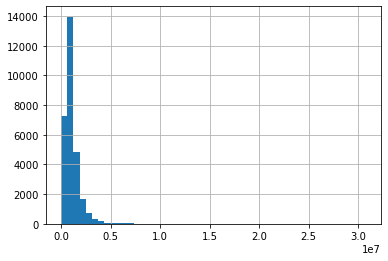

In [36]:
#to check is target ('price') is normal
y.hist(bins=50);

## *note**
target is not normally distributed

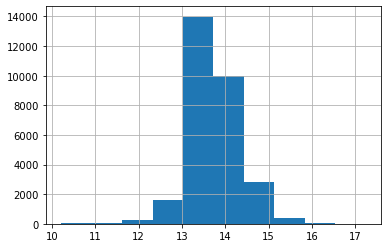

In [37]:
# log in order to make it more normal by scaling
y_scld = np.log(y)
y_scld.hist();

In [38]:
#building a model with the log scaled target 
model_data_sc = sm.OLS(y_scld, X).fit()
model_data_sc.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.390
Model:                            OLS   Adj. R-squared:                  0.390
Method:                 Least Squares   F-statistic:                     9345.
Date:                Sun, 12 Feb 2023   Prob (F-statistic):               0.00
Time:                        12:25:12   Log-Likelihood:                -18570.
No. Observations:               29199   AIC:                         3.715e+04
Df Residuals:                   29196   BIC:                         3.717e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          12.9404      0.006   1997.497      0.000      12.928      12.953
sqft_living     0.0004   5.81e-06     64.687      0.000       0.000       0.000
sqft_above  -1.426e-06   6.44e-06     -0.221      0.825   -1.41e-05    1.12e-05
==============================================================================
Omnibus:                     5813.968   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            45556.189
Skew:                          -0.746   Prob(JB):                         0.00
Kurtosis:                       8.935   Cond. No.                     7.47e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.47e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Interpretation: “For every one-unit increase in sqft_living results on average in a 0.0004 increase in the logarithm of price, i.e. an increase in price by a factor of e^0.0004."


In [39]:
print(f'''
A one-unit increase in the sqft_living variable corresponds to an 
increase in price by a factor of {round(np.exp(0.0004), 5)}, or
{100 * round(np.exp(0.0004) - 1,5)}%.
''')


A one-unit increase in the sqft_living variable corresponds to an 
increase in price by a factor of 1.0004, or
0.04%.



In [40]:
np.exp(0.0004)

1.0004000800106678

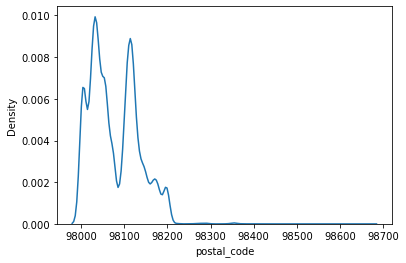

In [41]:
sns.kdeplot(only_king['postal_code']);

In [42]:
lr2 = LinearRegression().fit(X,y)

In [43]:
lr2.score(X,y)

0.3803567832865087

## *note**

Postal code account for 37% of the variation in price.

In [44]:
only_king.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long,postal_code
count,2.919900e+04,2.919900e+04,29199.000000,29199.000000,29199.000000,2.919900e+04,29199.000000,29199.000000,29199.000000,29199.000000,29199.000000,29199.000000,29199.000000,29199.000000,29199.000000,29199.000000
mean,4.536774e+09,1.112959e+06,3.436693,2.333111,2131.603891,1.711470e+04,1.517192,1826.341724,481.294222,336.517209,216.403404,1973.877359,93.628583,47.543151,-122.214430,98077.675503
std,2.881720e+09,8.954250e+05,0.976937,0.894453,976.697464,6.080172e+04,0.548690,880.115716,586.087503,286.156291,246.749038,31.669643,422.333382,0.147520,0.143129,55.202239
min,1.000055e+06,2.736000e+04,0.000000,0.000000,3.000000,4.020000e+02,1.000000,2.000000,0.000000,0.000000,0.000000,1900.000000,0.000000,45.636797,-122.666021,98001.000000
25%,2.092000e+09,6.450000e+05,3.000000,2.000000,1440.000000,5.000000e+03,1.000000,1190.000000,0.000000,0.000000,40.000000,1952.000000,0.000000,47.430098,-122.328338,98032.000000
50%,3.874011e+09,8.680000e+05,3.000000,2.500000,1940.000000,7.560000e+03,1.500000,1580.000000,0.000000,400.000000,142.000000,1976.000000,0.000000,47.557790,-122.234275,98059.000000
75%,7.287100e+09,1.310000e+06,4.000000,3.000000,2640.000000,1.076350e+04,2.000000,2290.000000,960.000000,520.000000,310.000000,2001.000000,0.000000,47.672043,-122.127630,98117.000000
max,9.904000e+09,3.075000e+07,13.000000,10.500000,15360.000000,3.253932e+06,4.000000,12660.000000,8020.000000,3580.000000,4370.000000,2022.000000,2022.000000,48.111504,-121.163960,98663.000000


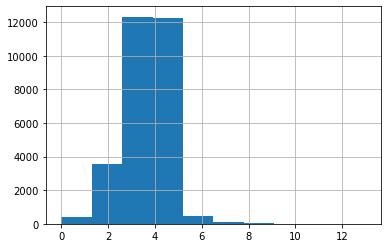

In [45]:
only_king['bedrooms'].hist();

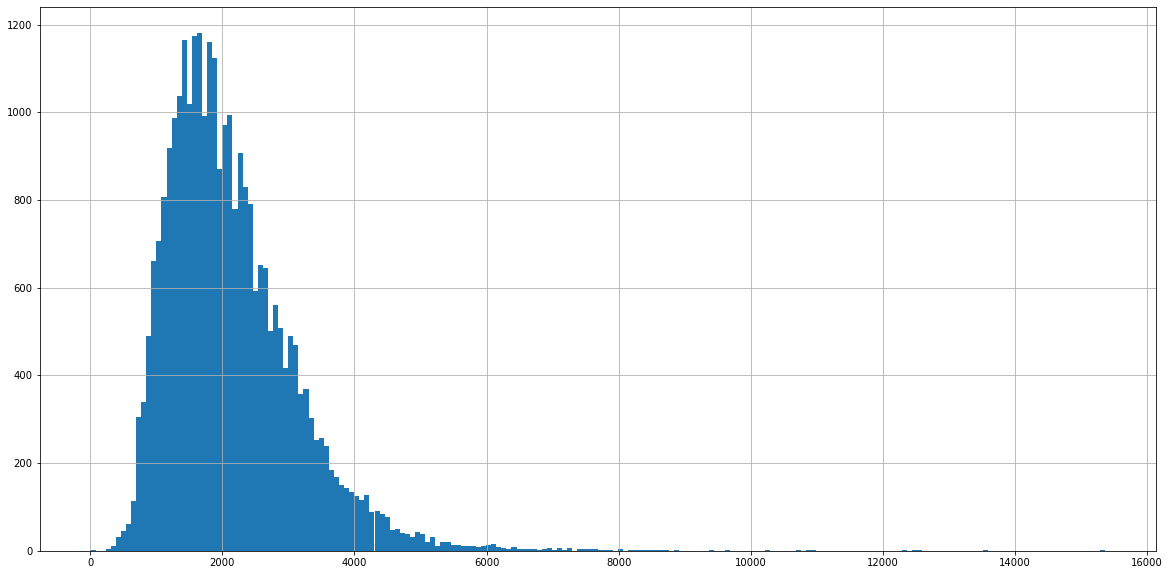

In [46]:
only_king['sqft_living'].hist(bins=200, figsize=(20,10));

In [47]:
#high sqft living if greater than 75th quartile
only_king['high_sqft_living'] = only_king['sqft_living'] > 2620

In [48]:
# correlation betw price and high sqft living room
only_king.corr()['price']['high_sqft_living']

0.45942251757930747

In [49]:
#1 = only_king.select_dtypes(include=float)
#1 = only_king['price']
#
#ns.pairplot(data=only_king, x_vars=X1, y_vars=y1);

KeyboardInterrupt: 

ValueError: Image size of 5255820x5255820 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 5.25582e+06x5.25582e+06 with 1014 Axes>

<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


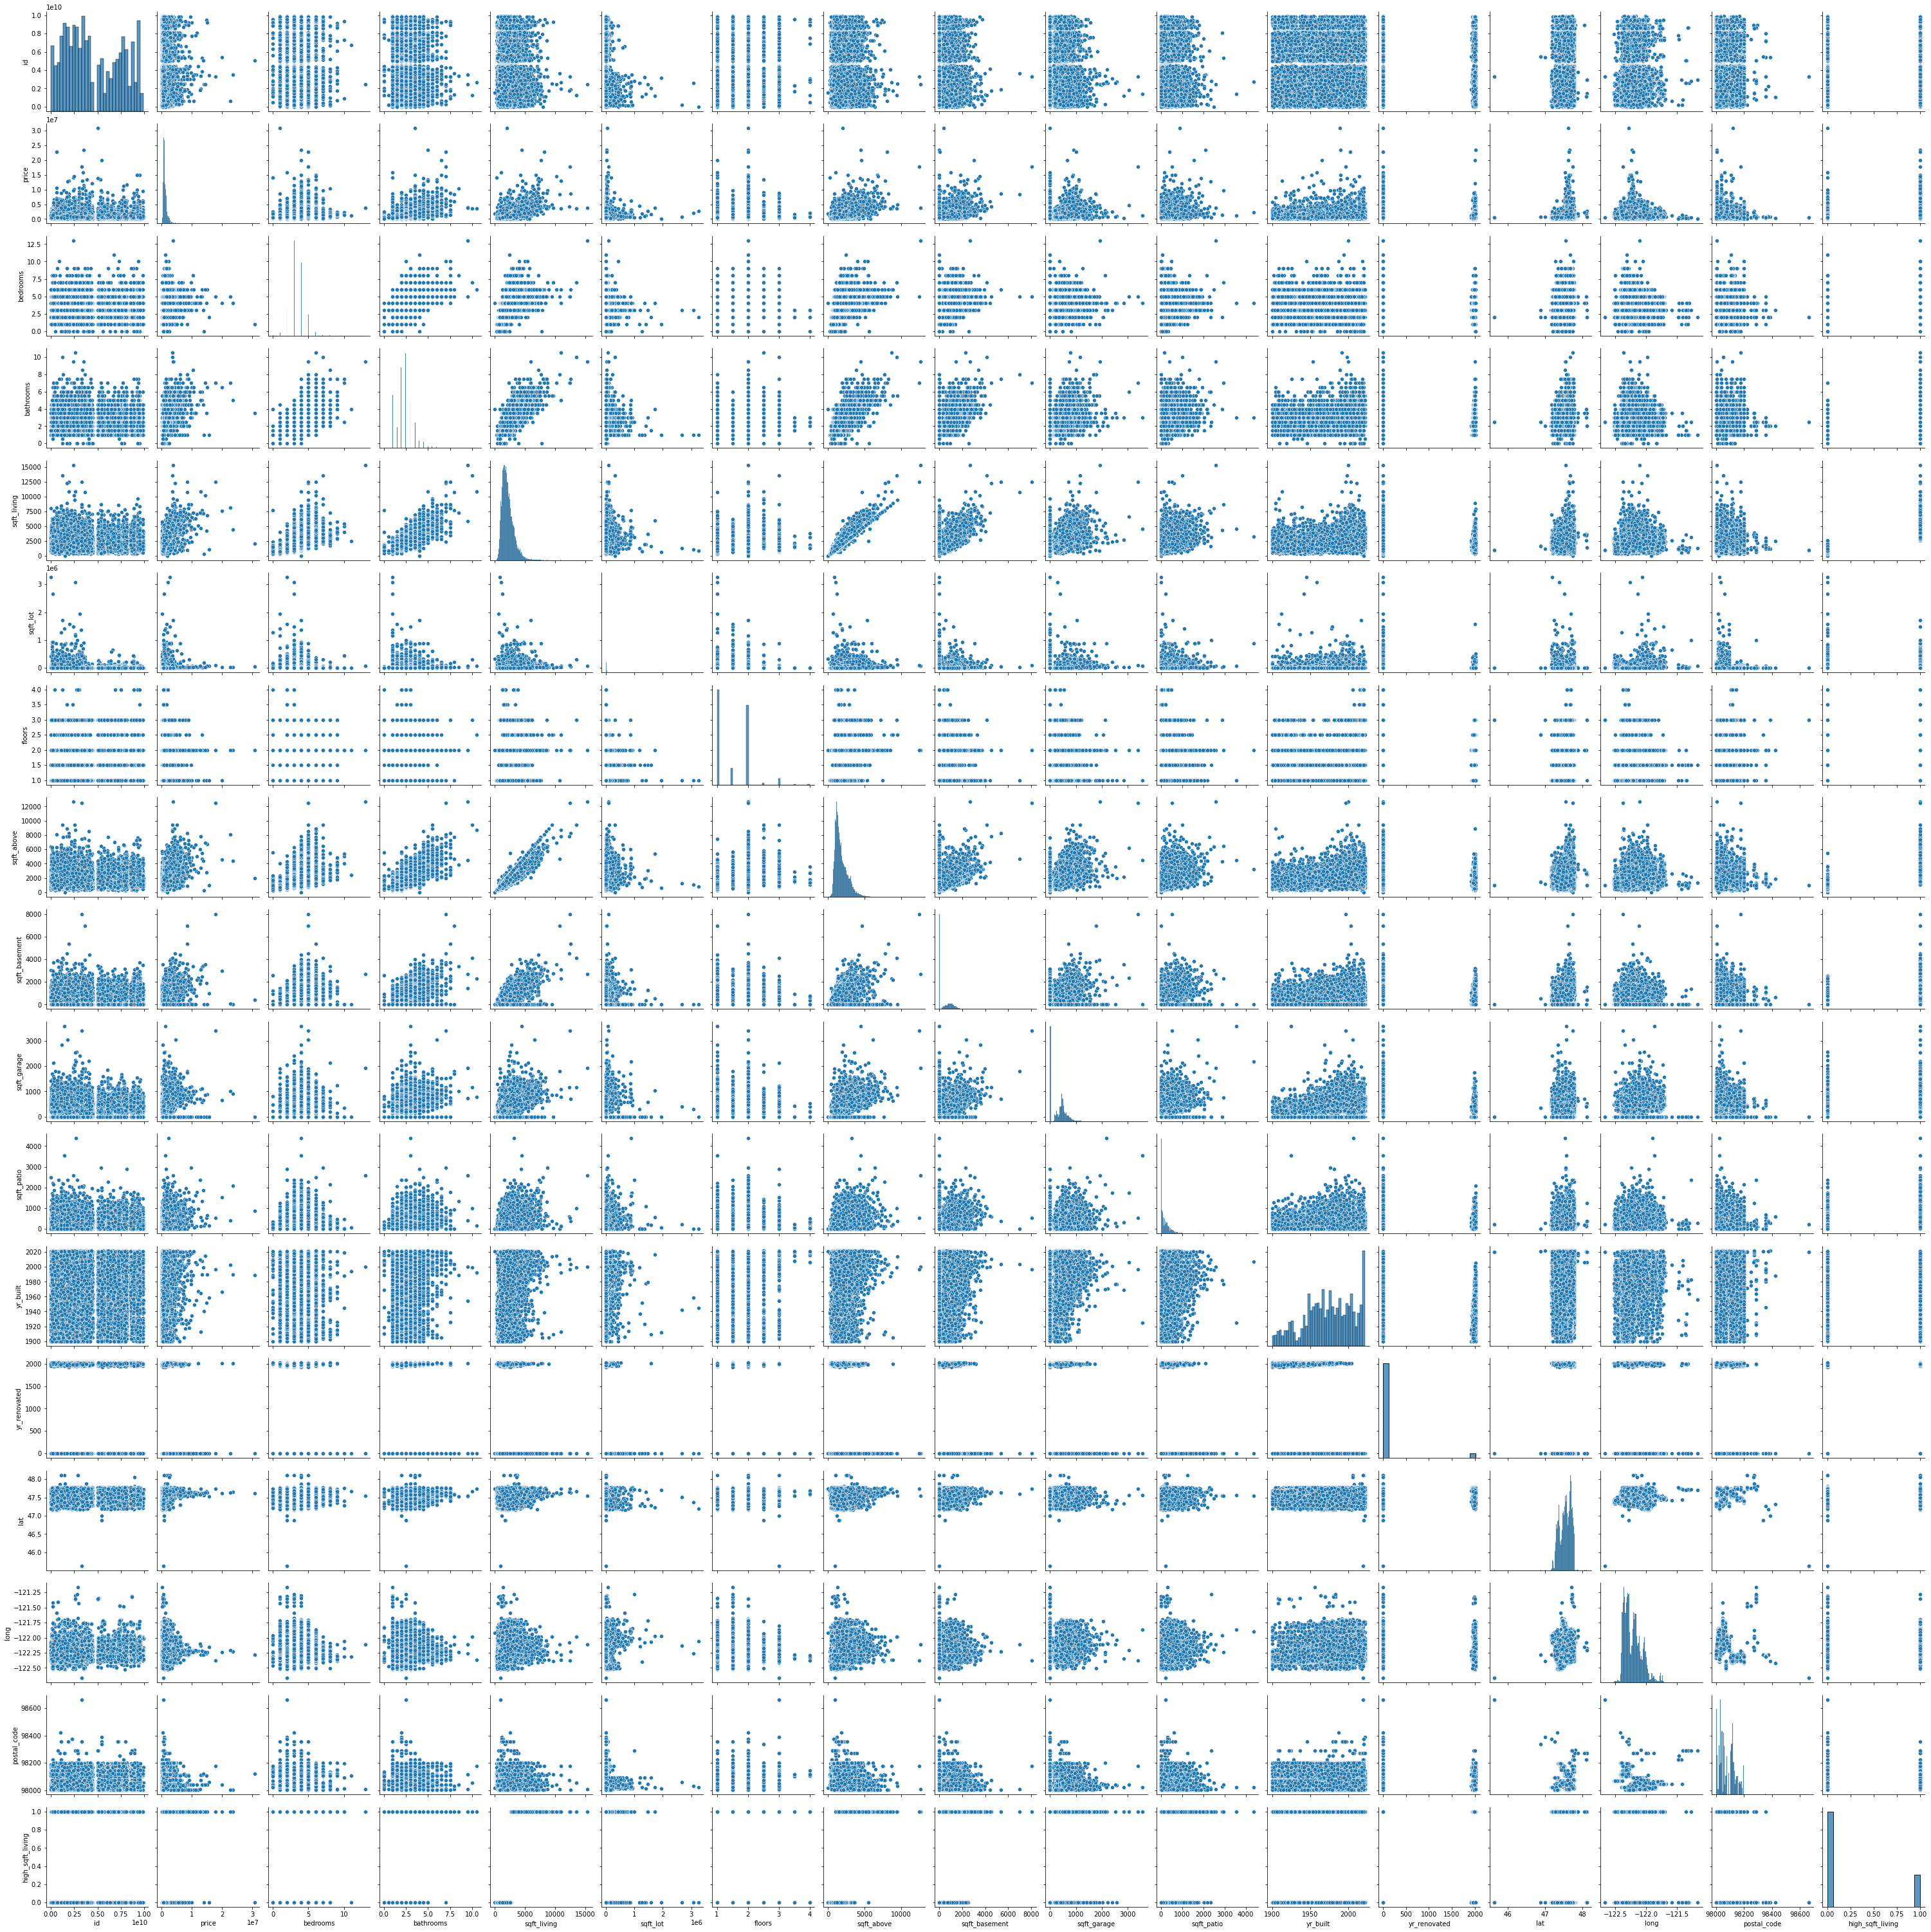

In [50]:
sns.pairplot(only_king);

In [51]:
only_king['grade'].unique()

array(['7 Average', '9 Better', '8 Good', '6 Low Average', '10 Very Good',
       '5 Fair', '11 Excellent', '12 Luxury', '4 Low', '13 Mansion',
       '3 Poor', '2 Substandard'], dtype=object)

In [52]:
only_king.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long,postal_code,high_sqft_living
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052,98055.0,False
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591,98133.0,True
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520,98178.0,True
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020,98118.0,False
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,...,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188,98027.0,False


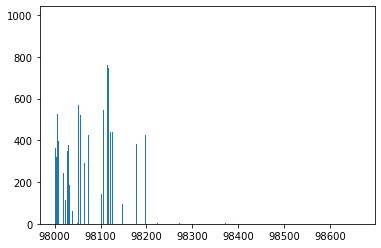

In [53]:
# 
postal_counts = only_king['postal_code'].value_counts()

fig,ax = plt.subplots()
ax.bar(postal_counts.index, postal_counts);

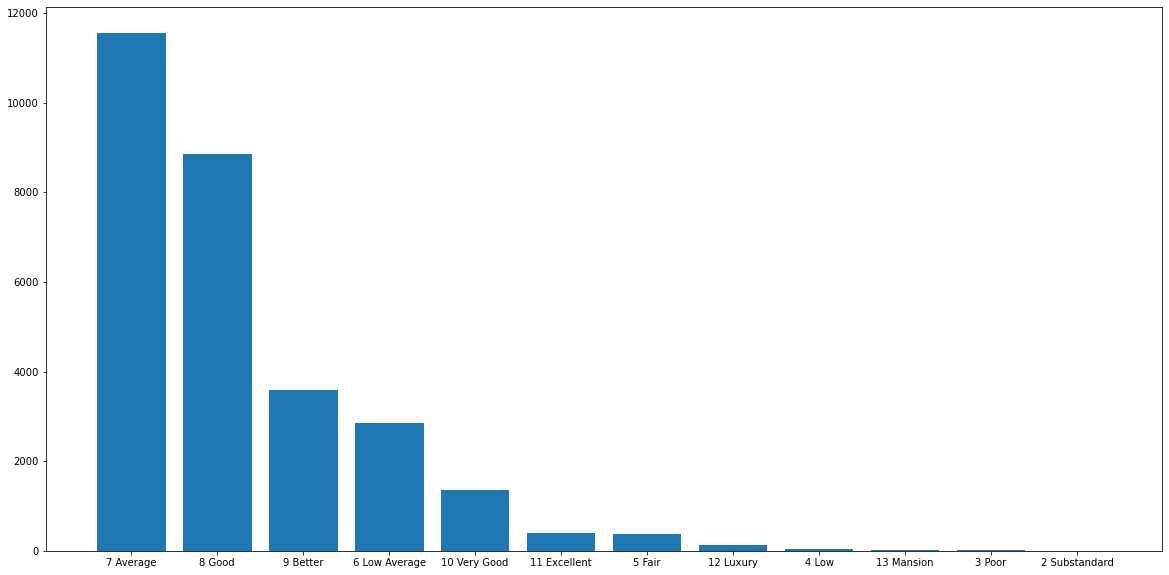

In [54]:
grade_counts = only_king['grade'].value_counts()

fig,ax = plt.subplots(figsize=(20, 10))
ax.bar(grade_counts.index, grade_counts);

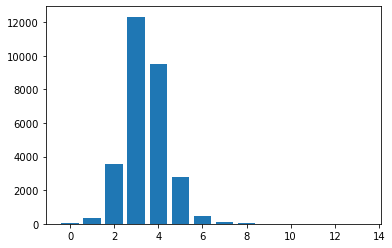

In [55]:
bedroom_counts = only_king['bedrooms'].value_counts()

fig,ax = plt.subplots()
ax.bar(bedroom_counts.index, bedroom_counts);

In [56]:
pd.get_dummies(data_clean['grade'])

,10 Very Good,11 Excellent,12 Luxury,13 Mansion,2 Substandard,3 Poor,4 Low,5 Fair,6 Low Average,7 Average,8 Good,9 Better
0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
30150,0,0,0,0,0,0,0,0,0,0,1,0
30151,0,0,0,0,0,0,0,0,0,1,0,0
30152,0,0,0,0,0,0,0,0,0,1,0,0
30153,0,0,0,0,0,0,0,0,0,0,1,0
